# Homework 2 - Garbage Identification

## Import libraries

In [11]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate
import pandas as pd

## Data Processing

In [3]:
data_path = './data/garbage'

In [45]:
data_index = pd.read_csv(str(data_path)+'/one-indexed-files.txt', sep=' ', names=['path', 'label'])
data_index.label = data_index.path.apply(lambda x: re.sub('[0-9]', '', x[:-4]))
data_index.path = data_index.path.apply(lambda x: data_path+'/images/'+re.sub('[0-9]', '', x[:-4])+'/'+x)

In [49]:
data_index.sample(5)

,path,label
1751,./data/garbage/images/plastic/plastic254.jpg,plastic
1919,./data/garbage/images/plastic/plastic422.jpg,plastic
2393,./data/garbage/images/trash/trash4.jpg,trash
926,./data/garbage/images/paper/paper426.jpg,paper
378,./data/garbage/images/glass/glass379.jpg,glass


In [88]:
np.random.seed(2)
data = ImageDataBunch.from_df('', data_index, ds_tfms=get_transforms(), size=(256,384), bs=64).normalize(imagenet_stats)

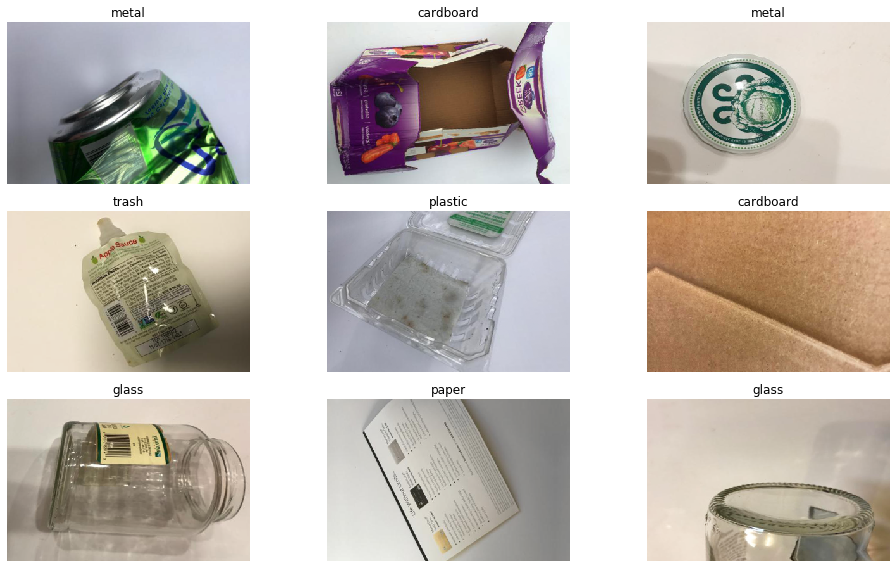

In [89]:
data.show_batch(rows=3, figsize=(14,8))

In [90]:
print(data.classes)
len(data.classes)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


6

## Training

In [91]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [92]:
learn.model_dir = './models/'

In [93]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.133105,0.611104,0.164356,00:25
1,0.705764,0.521826,0.132673,00:18
2,0.484209,0.411598,0.114851,00:18
3,0.333033,0.343451,0.102970,00:17
4,0.257665,0.342025,0.100990,00:18


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.91E-06
Min loss divided by 10: 1.58E-05


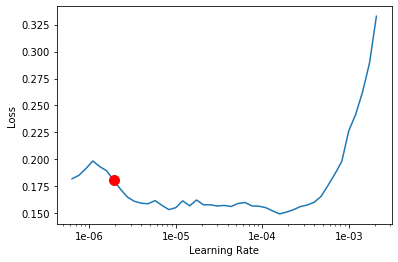

In [94]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [95]:
learn.fit_one_cycle(5, max_lr=slice(3e-06,3e-05))

epoch,train_loss,valid_loss,error_rate,time
0,0.137363,0.341025,0.097030,00:22
1,0.143356,0.338661,0.100990,00:22
2,0.132702,0.332422,0.093069,00:23
3,0.113935,0.339385,0.093069,00:23
4,0.098720,0.327617,0.097030,00:22


In [96]:
learn.save('garbage_resnet50')

## Results

In [97]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

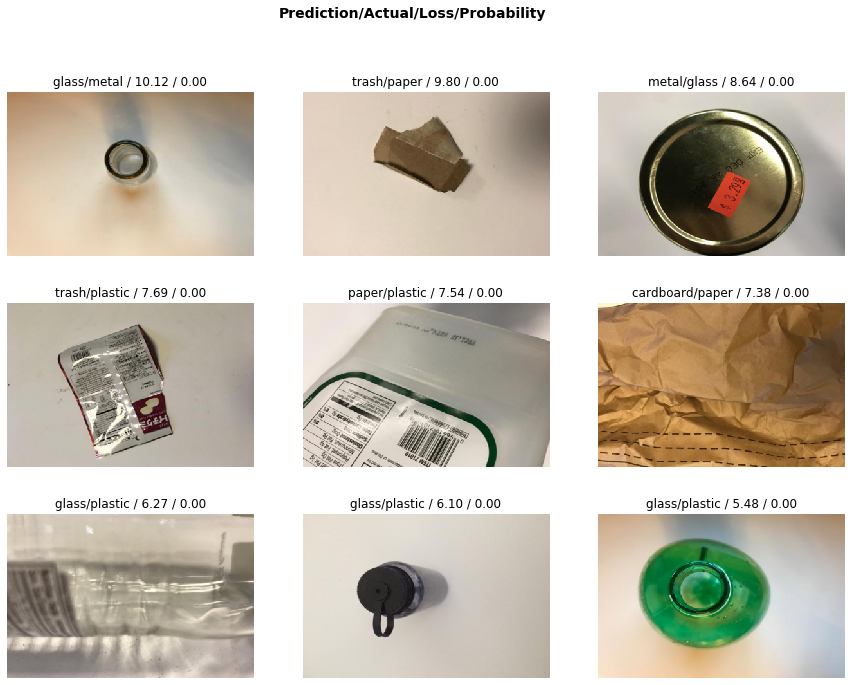

In [98]:
interp.plot_top_losses(9, figsize=(15,11))

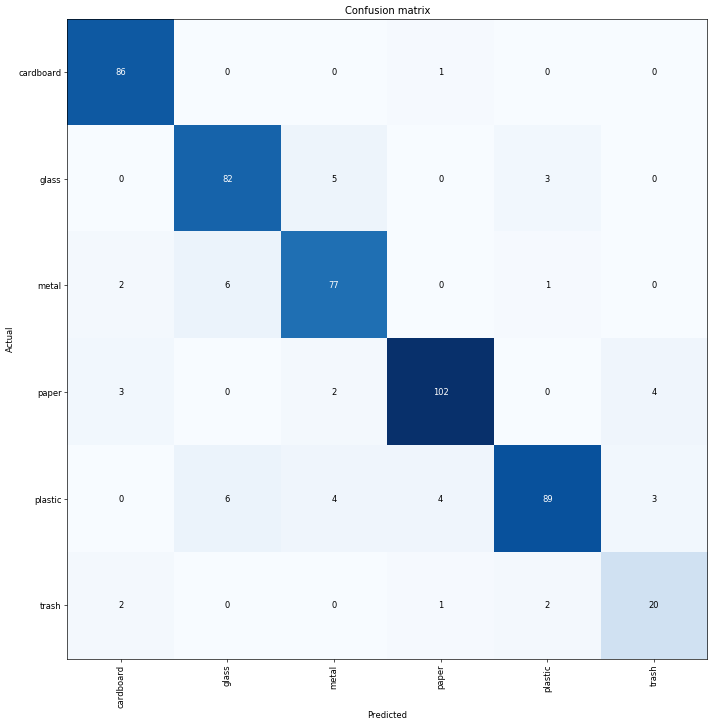

In [99]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [100]:
interp.most_confused(min_val=4)

[('metal', 'glass', 6),
 ('plastic', 'glass', 6),
 ('glass', 'metal', 5),
 ('paper', 'trash', 4),
 ('plastic', 'metal', 4),
 ('plastic', 'paper', 4)]